In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [2]:
#모델을 만드는 간단한 함수 정의.
#model_fn() 함수의 a_layer 매개변수로 keras 층을 추가하면 hidden layer뒤에 또 하나의 층을 추가하는 함수.
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10,activation='softmax'))
   
    return model
                

In [3]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
#verbose = 0이면 훈련과정을 보여주지 않는다.
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [5]:
#history 딕셔너리에는 손실과 정확도가 들어있다.
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


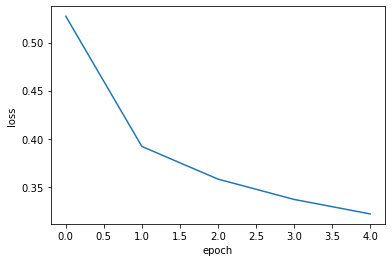

In [6]:
import matplotlib.pyplot as plt

#epoch에 따른 손실
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

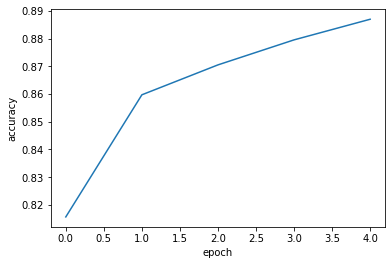

In [7]:
#epoch에 따른 정확도
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

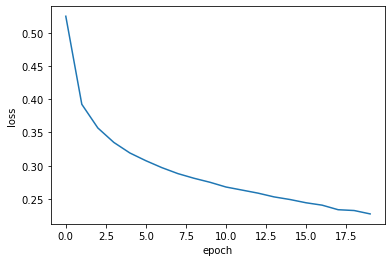

In [8]:
#에포크를 20으로 늘려서 손실그래프를 그려보기.
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

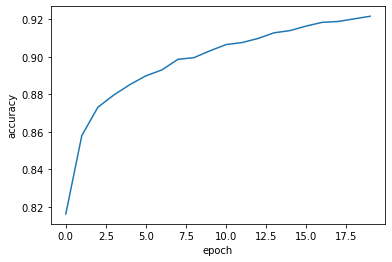

In [9]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [10]:
#epoch 마다 검증 손실을 계산하기 위해 fit()메서드에 validation_data 매개변수에 validation data 를 전달한다.
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data = (val_scaled, val_target))

In [11]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


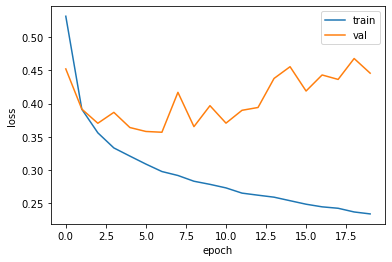

In [12]:
#5번째 epoch만에 loss가 다시 증가한다.
#epoch가 증가할수록 과대적합 모델이 만들어진다.
#loss가 증가하는 시점을 뒤로 늦춘다면 더 좋은 모델이 만들어 질 수 있다.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

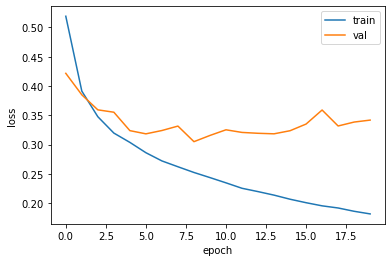

In [13]:
#optimizer, 하이퍼파라미터를 조정하여 과대적합을 완화시켜보자.
#적응적 학습률 알고리즘을 사용하면 epoch가 진행되면서 학습률의 크기를 조절한다.
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 드롭아웃(Dropout)
- train과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막는다.(랜덤한 몇개의 뉴런의 출력을 0으로 만든다.)

In [14]:
#30%정도의 dropout을 사용하기.
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


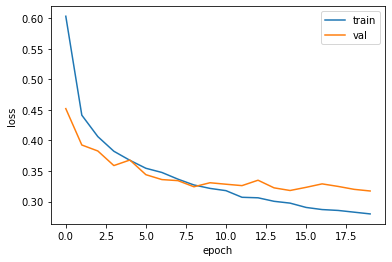

In [15]:
#train이 끝난 후에 평가나 예측을 수행 할 때에는 dropout을 적용하지 말아야 한다.
#tesor와 keras는 평가와 예측에 자동으로 dropout을 적용하지 않는다.

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose = 0, validation_data = (val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
#최적의 epoch를 10으로 하고 다시 훈련하기.
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose = 0, validation_data = (val_scaled,val_target))

In [16]:
#train된 모델의 파라미터 저장하기. save_weights()메서드 사용.
model.save_weights('model-weights.h5')

In [17]:
#모델의 구조와 파라미터를 함께 저장하기.
model.save('model-whole.h5')

In [20]:
#저장되었는지 확인
ls -al *.h5

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: C66B-F83B

 C:\Users\User\혼공머\2021_07_01(07-03) 디렉터리


 C:\Users\User\혼공머\2021_07_01(07-03) 디렉터리

2021-07-01(목)  오후 01:22           332,480 model-weights.h5
2021-07-01(목)  오후 01:23           981,760 model-whole.h5
               2개 파일           1,314,240 바이트
               0개 디렉터리  60,341,583,872 바이트 남음


In [23]:
#새로운 모델을 만들고 train된 모델 파라미터를 읽어서 적용하기.
#load_weights() 메서드를 사용하려면 save_weights()로 저장했던 모델과 정확히 같은 구조를 가져야 한다.
model = model_fn(keras.layers.Dropout(0,3))
model.load_weights('model-weights.h5')

In [25]:
#predict메서드는 클래스에 대한 확률을 반환한다.
# predict결과에서 가장 큰값을 고르기 위해 argmax()함수를 사용하였따.
#argmax는 가장큰 값의 인덱스를 반환한다.
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

0.8885


In [27]:
#저장된 모델 불러오기.
#loda_model()함수는 모델파라미터뿐아니라 모델구조와 옵티마이저 상태까지 모두 복원하기 때문에
#compile메서드없이 evalutate()메서드를 사용할수 있다.
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 586us/step - loss: 0.3173 - accuracy: 0.8885


[0.31730642914772034, 0.8884999752044678]

## 콜백(Callback)
- 지금까지는 모델을 훈련하여 epoch그래프를 확인해 최적의 epoch를 찾아 다시 훈련하였음.
- 하지만 이를 두번훈련하지 않고 콜백을사용하여 한번에 끝낸다.

In [29]:
#ModelCheckpoint 콜백은 기본적으로 최상의 검증 점수를 만드는 모델을 저장한다.
#모델이 훈련한 후 best-model.h5에 최상의 검증점수를 낸 모델이 저장된다.
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=10, verbose = 0, validation_data = (val_scaled,val_target), callbacks=[checkpoint_cb])

In [31]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 538us/step - loss: 0.3219 - accuracy: 0.8834


[0.32189857959747314, 0.8834166526794434]

## 조기종료(early stopping)
- 과대적합이 시작되기 전에 훈련을 미리 중지하는 것.
- keras에서는 EarlyStopping 콜백을 제공한다.
- patience매개변수를 'patience = 2'로지정하면 2번연속 검증점수가 향상되지 않으면 훈련을 중지한다.
- 'restore_best_weights = True'로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌린다.
- EarlyStopping을 ModelCheckpoint와 사용하면 가장 낮은 손실의 모델을 파일에 저장하고,
- 훈련을 중지한 다음 현재 모델의 파라미터를 최상의 파라미터로 되돌린다.


In [34]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data = (val_scaled, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb])

In [36]:
#몇번째 epoch에서 훈련이 중지되었는지 확인하기.
print(early_stopping_cb.stopped_epoch)
#11은 12번째 epoch에서 훈련이 중지되었다는 말. 따라서 최상의 모델은 10번째 epoch이다.

11


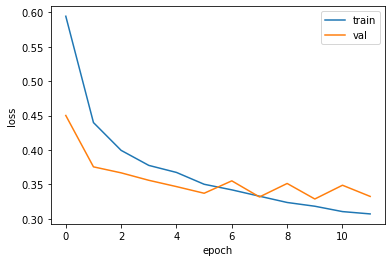

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [40]:
#조기 종료로 얻은 모델을 사용하여 성능확인
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 571us/step - loss: 0.3287 - accuracy: 0.8804


[0.32866665720939636, 0.8804166913032532]